# Yulu Business Case Study - Hypothesis Testing 🚲  
_By Ravi Savaliya_

### Findings & Insights 🔍

In this analysis, I attempted to check for the underlying assumptions of each statistical test. Although the assumptions may not have been fully met, I proceeded with the hypothesis testing to gain insights into the relationships affecting electric cycle rentals.

1. **Working Day Effect (2-Sample T-Test)**:
   - **Result**: Fail to reject the null hypothesis (H₀).
   - **P-Value**: 0.226, which is greater than the significance level of 0.05.
   - **Conclusion**: Working Day has no significant effect on the number of electric cycles rented.

2. **Season Effect (One-Way ANOVA)**:
   - **Result**: Reject the null hypothesis (H₀).
   - **P-Value**: \(6.16 \times 10^{-149}\), which is significantly less than the significance level of 0.05.
   - **Conclusion**: There is a significant difference in the number of electric cycles rented across different seasons.

3. **Weather Effect (One-Way ANOVA)**:
   - **Result**: Reject the null hypothesis (H₀).
   - **P-Value**: \(5.48 \times 10^{-42}\), also significantly less than the significance level of 0.05.
   - **Conclusion**: There is a significant difference in the number of electric cycles rented across different weather conditions.

4. **Chi-Square Test**:
   - **Result**: Reject the null hypothesis (H₀).
   - **P-Value**: \(1.55 \times 10^{-7}\)
   - **Conclusion**: There is a significant association between weather and season.

Overall, the analysis highlights the significant influences of season and weather on electric cycle rentals, while working day status appears to have no notable impact. Despite not meeting all assumptions for the tests, we gleaned valuable insights that can inform decision-making for improving rental services. 🚴‍♀️✨

## **Technical & Code**

## Section 1. Introduction 

### 1.1 About Yulu  
Yulu is India's leading micro-mobility service provider offering shared electric cycles for daily commutes. Its mission is to alleviate traffic congestion by providing an affordable, eco-friendly, and convenient commuting solution through their user-friendly app.

Yulu zones are strategically placed near metro stations, bus stands, office spaces, residential areas, and corporate offices, ensuring a smooth first- and last-mile connectivity.

### 1.2 Business Problem  
Yulu has experienced a significant decline in its revenues and is looking to understand the factors influencing the demand for shared electric cycles in the Indian market. They have engaged a consulting firm to analyze which variables are significant in predicting demand and how well these variables explain it.

### 1.3 Dataset Overview 📊  
The dataset `yulu_data.csv` contains the following columns:  
- 📅 `datetime`: Date and time of the observation  
- 🌱 `season`: Season (1: spring, 2: summer, 3: fall, 4: winter)  
- 🏖️ `holiday`: Whether the day is a holiday or not  
- 🏢 `workingday`: Whether the day is a working day (1: working day, 0: weekend/holiday)  
- 🌤️ `weather`: Weather condition categories  
- 🌡️ `temp`: Actual temperature in Celsius  
- 🌡️ `atemp`: Feels-like temperature in Celsius  
- 💧 `humidity`: Humidity percentage  
- 🍃 `windspeed`: Wind speed  
- 👤 `casual`: Number of casual users  
- 👥 `registered`: Number of registered users  
- 🚴 `count`: Total number of electric cycles rented (dependent variable) 

## Section 2. Data Loading, Preprocessing & EDA

### 2.1 Importing Libraries 📚  
We begin by importing all necessary libraries required for data analysis and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2.2 Loading the Dataset 📂 

In [2]:
# Loading the dataset
data = pd.read_csv('bike_sharing.csv')

### 2.3 Exploratory Data Analysis (EDA) 🔍  
- **Data Structure**:  
  Checking the structure and characteristics of the dataset.

In [3]:
# Display the first few rows of the dataset
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Data Size
data_size = data.shape
print(f"The given data has {data_size[0]} rows and {data_size[1]} columns.")

The given data has 10886 rows and 12 columns.


- **Data Types**:  
  Understanding the data types and converting variable data type as necessary.

In [5]:
# Check data types
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
# Converting 'datetime' values from object ---> datetime
# Converting season,holiday,workingday,weather from int64 ---> category

data['datetime'] = pd.to_datetime(data['datetime'])
data[['season','holiday','workingday','weather']] = data[['season','holiday','workingday','weather']].astype('category')

In [7]:
# Cheking data types post changes
data.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

- **Null Data Check**:  
  Checking if there is any null data at all and dealing with it if necessary.

In [8]:
# Checking for missing values
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- **Statistical Summary**:  
  Getting the summary statistics of the dataset.

In [9]:
# Summary statistics for numerical columns
data[['temp','atemp','humidity','windspeed','casual','registered','count']].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
# Summary statistics for categorical columns
data[['season','holiday','workingday','weather']].describe()

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [11]:
# Summary statistics for categorical columns
cat_features = ['season','holiday','workingday','weather']
for feature in cat_features:
    print("Feature Name - ",feature)
    print(data[feature].value_counts())
    print('-------------------------')
    print('\n')

Feature Name -  season
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
-------------------------


Feature Name -  holiday
holiday
0    10575
1      311
Name: count, dtype: int64
-------------------------


Feature Name -  workingday
workingday
1    7412
0    3474
Name: count, dtype: int64
-------------------------


Feature Name -  weather
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
-------------------------




In [12]:
# Summary statistics for datetime column
data[['datetime']].describe()

,datetime
count,10886
mean,2011-12-27 05:56:22.399411968
min,2011-01-01 00:00:00
25%,2011-07-02 07:15:00
50%,2012-01-01 20:30:00
75%,2012-07-01 12:45:00
max,2012-12-19 23:00:00


In [13]:
# Number of unique records based on datetime column
data['datetime'].nunique()

10886

In [14]:
# Checking for data duplication
data.duplicated().sum()

0

## Data Exploration Update 📊

The dataset has **10,886 rows** and **12 columns**. Here’s a summary of the data:

- **Numerical Columns (7)**:  
  `temp`, `atemp`, `humidity`, `windspeed`, `casual`, `registered`, `count`
  
- **Categorical Columns (4)**:  
  `season`, `holiday`, `workingday`, `weather`
  
- **Datetime Column (1)**:  
  `datetime`

### Timeline of Data  
- The data ranges from **2011-01-01 00:00:00** to **2012-12-19 23:00:00**.

### Datetime Column:
- **datetime**: All **10,886 values** are unique, indicating no duplication of data.


## Section 3. Univariate Analysis 📊  
We'll perform univariate analysis to explore the distribution of continuous and categorical variables.

### 3.1 Univariate Analysis (Continuous Variables) 📊

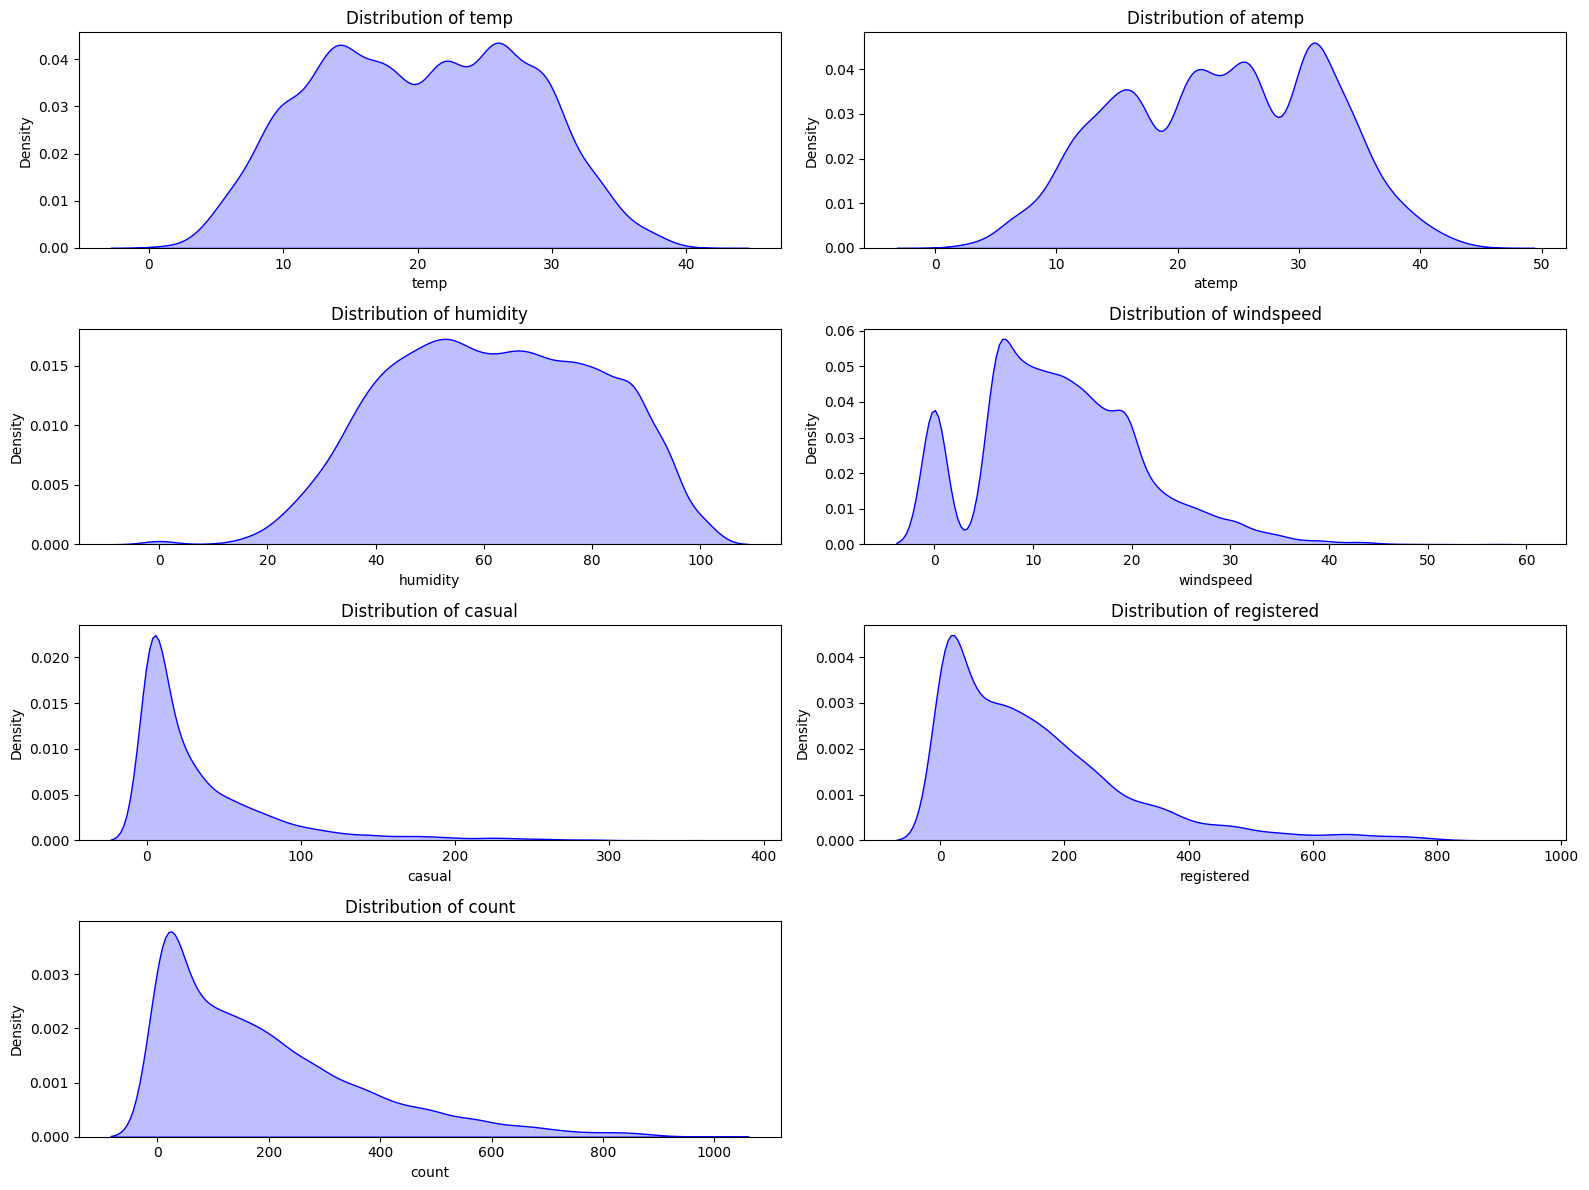

In [15]:
# List of numerical columns
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Setting up the figure for multiple plots
plt.figure(figsize=(16, 12))

# Looping through each numerical column and plotting the KDE
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)  # Creating a 4x2 grid of subplots
    sns.kdeplot(data=data, x=col, shade=True, color='b')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

### 3.2 Univariate Analysis (Categorical Variables) 🥧

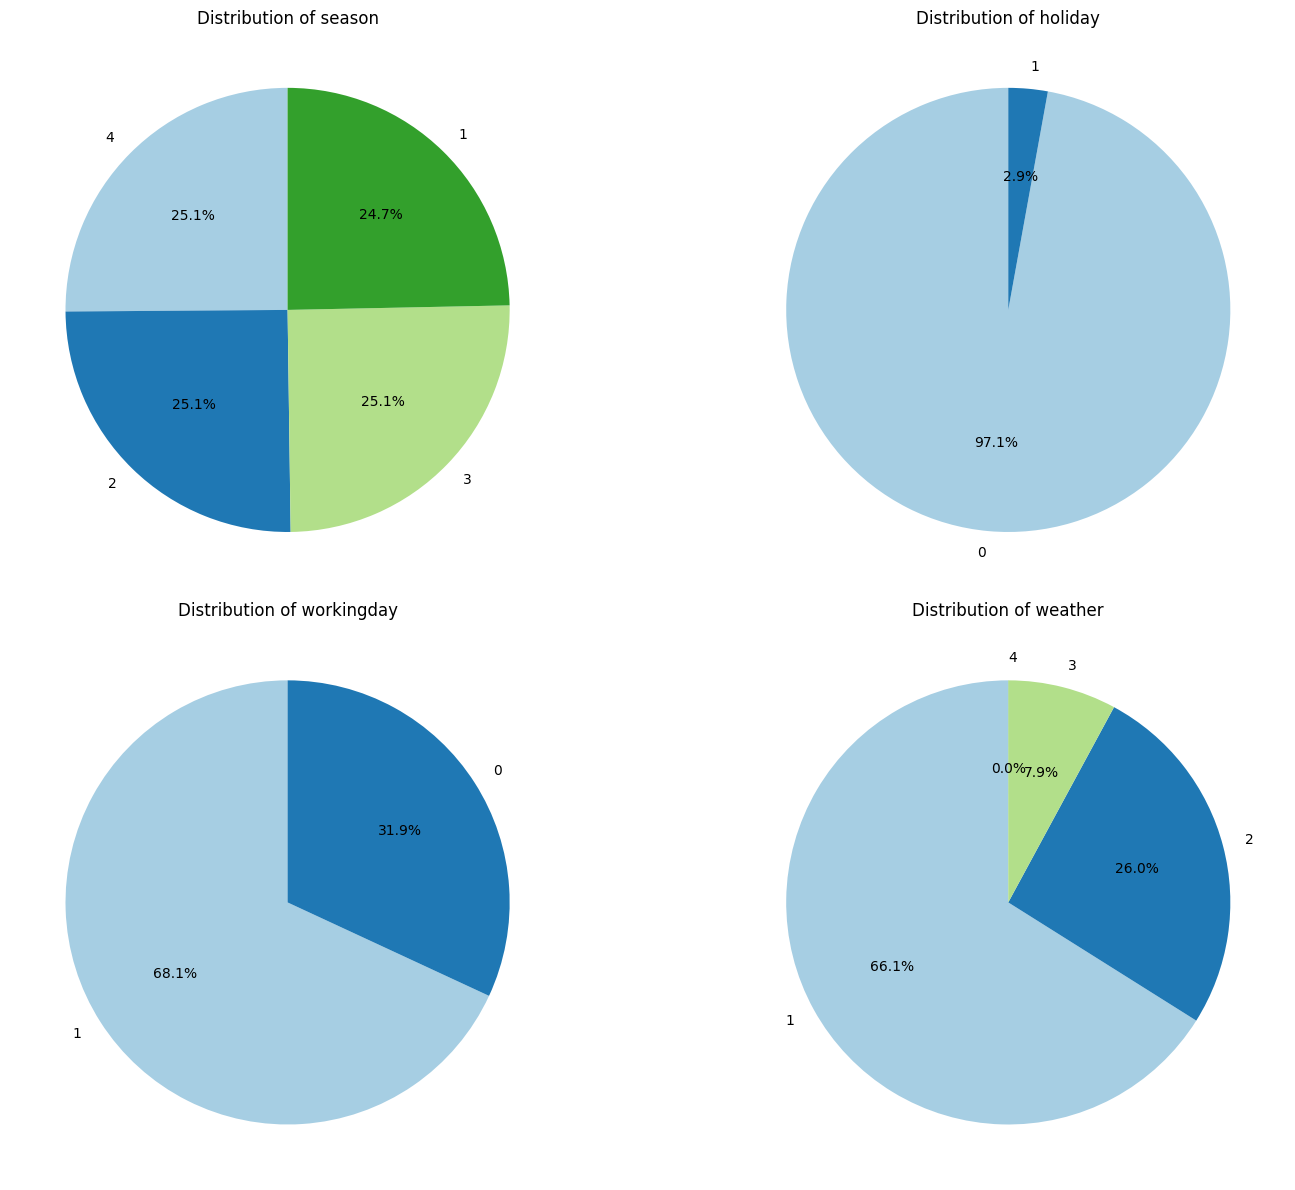

In [16]:
# List of categorical columns
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Setting up the figure for multiple pie charts
plt.figure(figsize=(16, 12))

# Loop through each categorical column and create a pie chart
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  # Creating a 2x2 grid of subplots
    sub_data = data[col].value_counts()  # Count the occurrences of each category
    plt.pie(sub_data, labels=sub_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()

## Section 4. Bivariate Analysis 🔗  
Now, we’ll examine relationships between key variables, particularly between the independent variables and the dependent variable (`count`).

### 4.1 Working Day vs. Electric Cycles Count  


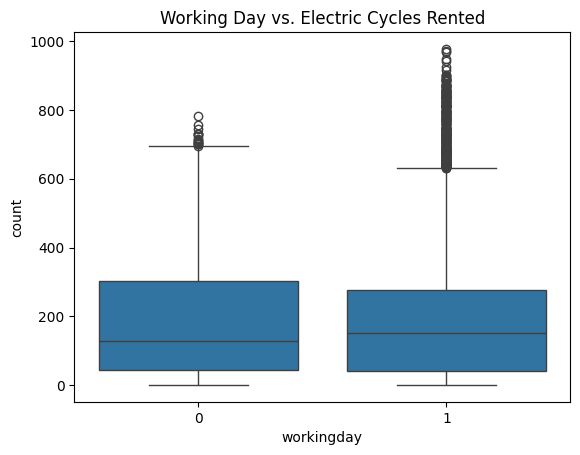

In [17]:
sns.boxplot(x='workingday', y='count', data=data)
plt.title('Working Day vs. Electric Cycles Rented')
plt.show()

### 4.2 Season vs. Electric Cycles Count  

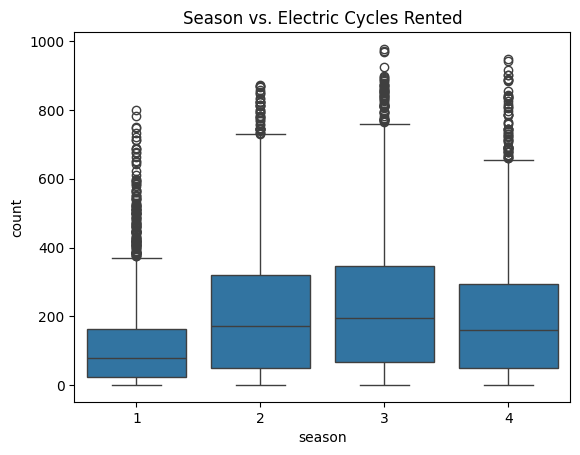

In [18]:
sns.boxplot(x='season', y='count', data=data)
plt.title('Season vs. Electric Cycles Rented')
plt.show()

### 4.3 Weather vs. Electric Cycles Count  

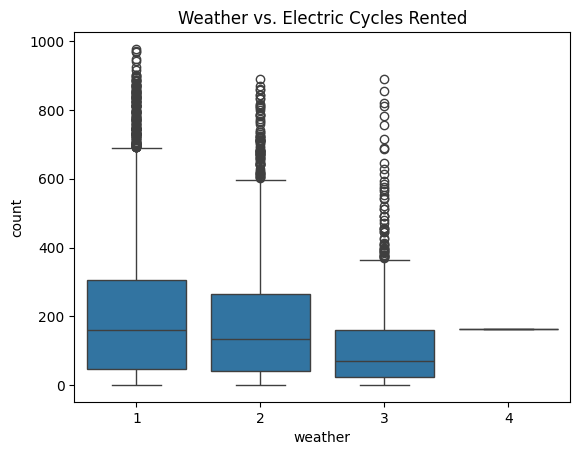

In [19]:
sns.boxplot(x='weather', y='count', data=data)
plt.title('Weather vs. Electric Cycles Rented')
plt.show()

### Insights from Visual Analysis 🌟

- **Continuous Variables**:
  - The distributions of **humidity**, **temperature**, **apparent temperature**, and **windspeed** do not resemble any well-known distributions; they appear random and are definitely not normally distributed.
  - Among the continuous variables **casual**, **registered**, and **count**, all three are right-skewed. 📈

- **Categorical Variables**:
  - The distribution of all four **seasons** is almost equal, each accounting for approximately **25%**. 🌸☀️🍂❄️
  - In the **holiday** column, **97.1%** of the data corresponds to **0** (not a holiday), while the remaining **2.9%** is for **1** (holiday). 🎉
  - For **working day**, about **68.1%** of the data is **1** (working day), and **31.9%** is **0** (not a working day). 💼
  - The distribution of **weather** shows **66.1%** for **1**, **27.9%** for **2**, **8.0%** for **3**, and **0.0%** for **4**. ☁️🌧️🌩️

- **Relationships**:
  - **Working Day vs. Electric Cycles Rented**: The median rentals for both working days and non-working days are similar, but the maximum for **0** is higher than for **1**. Additionally, there are many more positive outliers for **1**. 🚴‍♂️
  
  - **Season vs. Electric Cycles Rented**: All seasons show similarity in rentals, but season **3** has the highest range, followed by season **2**, season **4**, and finally season **1**. Interestingly, season **1** has a lot of outliers with wide values from its maximum when compared to the other seasons. 🌞🍂

  - **Weather vs. Electric Cycles Rented**: The widest range of rentals is seen in **weather 1**, followed by **weather 2**, then **weather 3**. The data for **weather 4** is minimal, with the boxplot resembling a single line since it has only one data point. 🌈

## Section 5. Hypothesis Testing 🧪  
We’ll conduct hypothesis tests to determine the significance of variables in predicting electric cycle demand.


### 5.1  2-Sample T-Test: Working Day Effect on Cycle Rentals

#### Step 1: **Null Hypothesis (H₀)**  
Working Day has no effect on the number of electric cycles rented.  
H₀: μ₁ = μ₂  
(Mean rentals on working days = Mean rentals on non-working days)

#### Step 2: **Alternate Hypothesis (H₁)**  
Working Day has a significant effect on the number of electric cycles rented.  
H₁: μ₁ ≠ μ₂  
(Mean rentals on working days ≠ Mean rentals on non-working days)

#### Step 3: **Test Statistic**  
We will use the **2-sample t-test** to compare the means between two independent groups (working days vs non-working days).

#### Step 4: **Nature of the Test**  
Since we are testing whether the means are different in either direction, this will be a **two-tailed test**.

#### Step 5: **Significance Level**  
We will conduct the test at a significance level (α) of **0.05**.

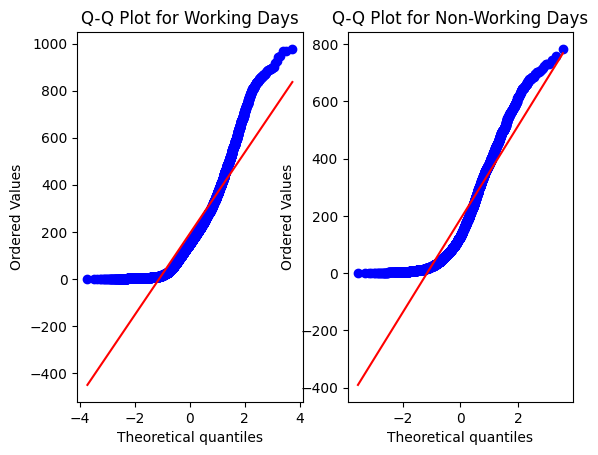

Levene’s Test: Statistics=0.004972848886504472, p-value=0.9437823280916695


In [20]:
# But before we go to testing, it is essential to test the assumptions that 2 Sample T Test assumes.
# Normality(QQ - plot )
working_day = data[data['workingday'] == 1]['count']
non_working_day = data[data['workingday'] == 0]['count']

# Q-Q Plot for Working Day Rentals
plt.subplot(1, 2, 1)
stats.probplot(working_day, dist="norm", plot=plt)
plt.title('Q-Q Plot for Working Days')

# Q-Q Plot for Non-Working Day Rentals
plt.subplot(1, 2, 2)
stats.probplot(non_working_day, dist="norm", plot=plt)
plt.title('Q-Q Plot for Non-Working Days')

plt.show()

test_statistic, p_value = stats.levene(working_day, non_working_day)
print(f'Levene’s Test: Statistics={test_statistic}, p-value={p_value}')

In [21]:
# According to the testing of the assumptions the similar variances test passes while the normality does not pass, still we would move further to know

# Significance level
alpha = 0.05

# Perform the 2-Sample T-Test
test_statistic, p_value = stats.ttest_ind(working_day, non_working_day, equal_var=True)

# Interpretation of the test results
if p_value > alpha:
    print(f'Fail to reject the null hypothesis (H₀).')
    print(f'The p-value is {p_value}, which is greater than the significance level of {alpha}.')
    print('Conclusion: Working Day has no significant effect on the number of electric cycles rented.')
else:
    print(f'Reject the null hypothesis (H₀).')
    print(f'The p-value is {p_value}, which is less than the significance level of {alpha}.')
    print('Conclusion: Working Day has a significant effect on the number of electric cycles rented.')

Fail to reject the null hypothesis (H₀).
The p-value is 0.22644804226361348, which is greater than the significance level of 0.05.
Conclusion: Working Day has no significant effect on the number of electric cycles rented.


### 5.2.1 ANOVA: Season Effect on Cycle Rentals

#### Step 1: **Null Hypothesis (H₀)**  
There is no significant difference in the number of electric cycles rented across different seasons.  
H₀: μ₁ = μ₂ = μ₃ = μ₄  
(Means of rentals in all seasons are equal)

#### Step 2: **Alternate Hypothesis (H₁)**  
There is a significant difference in the number of electric cycles rented across different seasons.  
H₁: At least one season has a different mean rental value.

#### Step 3: **Test Statistic**  
We will use the **One-Way ANOVA** test to check for differences in means across more than two groups (seasons).

#### Step 4: **Nature of the Test**  
This will be a **two-tailed test** since we are checking for any significant difference in either direction.

#### Step 5: **Significance Level**  
The significance level (α) chosen is **0.05**.

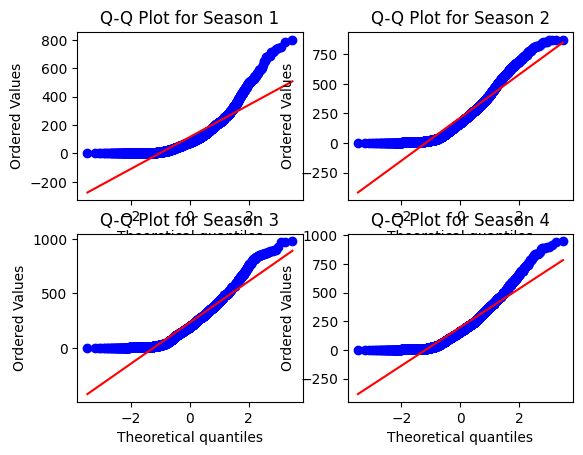

Levene’s Test: Statistics=1.2096277376026694, p-value=1.0147116860043298e-118


In [22]:
# Testing the assumptions for One-Way Anova
# normality test
season1 = data[data['season'] == 1]['count']
season2 = data[data['season'] == 2]['count']
season3 = data[data['season'] == 3]['count']
season4 = data[data['season'] == 4]['count']

# Q-Q Plot for Season1
plt.subplot(2, 2, 1)
stats.probplot(season1, dist="norm", plot=plt)
plt.title('Q-Q Plot for Season 1')

# Q-Q Plot for Season2
plt.subplot(2, 2, 2)
stats.probplot(season2, dist="norm", plot=plt)
plt.title('Q-Q Plot for Season 2')

# Q-Q Plot for Season3
plt.subplot(2, 2, 3)
stats.probplot(season3, dist="norm", plot=plt)
plt.title('Q-Q Plot for Season 3')

# Q-Q Plot for Season4
plt.subplot(2, 2, 4)
stats.probplot(season4, dist="norm", plot=plt)
plt.title('Q-Q Plot for Season 4')

plt.show()

# equal variance across gruops test - levenes test
test_statsitic,p_value = stats.levene(season1,season2,season3,season4)
print(f'Levene’s Test: Statistics={test_statistic}, p-value={p_value}')

In [23]:
# The test for normality and equal variance across groups both failed but going ahead with the test

# Significance level
alpha = 0.05

# Perform the 1-Way ANOVA Test
test_statistic, p_value = stats.f_oneway(season1, season2, season3, season4)

# Interpretation of the test results
if p_value > alpha:
    print(f'Fail to reject the null hypothesis (H₀).')
    print(f'The p-value is {p_value}, which is greater than the significance level of {alpha}.')
    print('Conclusion: There is no significant difference in the number of electric cycles rented across different seasons.')
else:
    print(f'Reject the null hypothesis (H₀).')
    print(f'The p-value is {p_value}, which is less than the significance level of {alpha}.')
    print('Conclusion: There is a significant difference in the number of electric cycles rented across different seasons.')

Reject the null hypothesis (H₀).
The p-value is 6.164843386499654e-149, which is less than the significance level of 0.05.
Conclusion: There is a significant difference in the number of electric cycles rented across different seasons.


### 5.2.2 ANOVA: Weather Effect on Cycle Rentals

#### Step 1: **Null Hypothesis (H₀)**  
There is no significant difference in the number of electric cycles rented across different weather conditions.  
H₀: μ₁ = μ₂ = μ₃ = μ₄  
(Means of rentals in all weather conditions are equal)

#### Step 2: **Alternate Hypothesis (H₁)**  
There is a significant difference in the number of electric cycles rented across different weather conditions.  
H₁: At least one weather condition has a different mean rental value.

#### Step 3: **Test Statistic**  
We will use the **One-Way ANOVA** test to check for differences in means across more than two groups (weather conditions).

#### Step 4: **Nature of the Test**  
This will be a **two-tailed test** since we are checking for any significant difference in either direction.

#### Step 5: **Significance Level**  
The significance level (α) chosen is **0.05**.

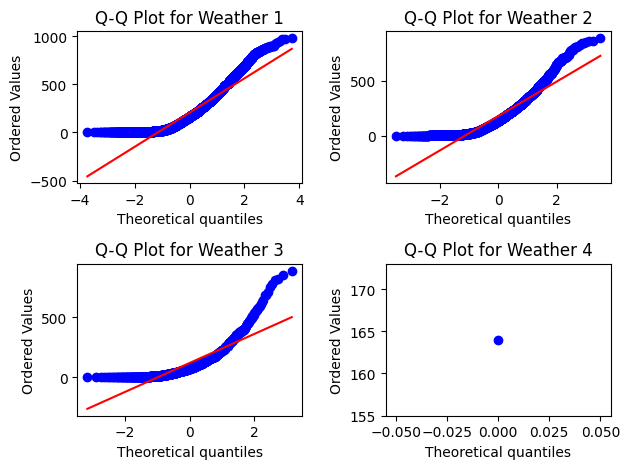

Levene’s Test: Statistic=54.85106195954556, p-value=3.504937946833238e-35


In [24]:
# Creating groups for weather conditions
weather1 = data[data['weather'] == 1]['count']
weather2 = data[data['weather'] == 2]['count']
weather3 = data[data['weather'] == 3]['count']
weather4 = data[data['weather'] == 4]['count']

# Q-Q Plot for Weather1
plt.subplot(2, 2, 1)
stats.probplot(weather1, dist="norm", plot=plt)
plt.title('Q-Q Plot for Weather 1')

# Q-Q Plot for Weather2
plt.subplot(2, 2, 2)
stats.probplot(weather2, dist="norm", plot=plt)
plt.title('Q-Q Plot for Weather 2')

# Q-Q Plot for Weather3
plt.subplot(2, 2, 3)
stats.probplot(weather3, dist="norm", plot=plt)
plt.title('Q-Q Plot for Weather 3')

# Q-Q Plot for Weather4
plt.subplot(2, 2, 4)
stats.probplot(weather4, dist="norm", plot=plt)
plt.title('Q-Q Plot for Weather 4')

plt.tight_layout()
plt.show()

# Levene’s Test for Equal Variance across weather groups
test_statistic, p_value = stats.levene(weather1, weather2, weather3, weather4)
print(f'Levene’s Test: Statistic={test_statistic}, p-value={p_value}')

In [25]:
# The test for normality and equal variance across weather groups both failed but going ahead with the test

# Significance level
alpha = 0.05

# Perform the 1-Way ANOVA Test for weather groups
test_statistic, p_value = stats.f_oneway(weather1, weather2, weather3, weather4)

# Interpretation of the test results
if p_value > alpha:
    print(f'Fail to reject the null hypothesis (H₀).')
    print(f'The p-value is {p_value}, which is greater than the significance level of {alpha}.')
    print('Conclusion: There is no significant difference in the number of electric cycles rented across different weather conditions.')
else:
    print(f'Reject the null hypothesis (H₀).')
    print(f'The p-value is {p_value}, which is less than the significance level of {alpha}.')
    print('Conclusion: There is a significant difference in the number of electric cycles rented across different weather conditions.')


Reject the null hypothesis (H₀).
The p-value is 5.482069475935669e-42, which is less than the significance level of 0.05.
Conclusion: There is a significant difference in the number of electric cycles rented across different weather conditions.


### 5.3 Chi-Square Test: Weather Dependency on Season

#### Step 1: **Null Hypothesis (H₀)**  
Weather is independent of the season.  
H₀: Weather and season are independent variables.

#### Step 2: **Alternate Hypothesis (H₁)**  
Weather is dependent on the season.  
H₁: Weather and season are not independent variables.

#### Step 3: **Test Statistic**  
We will use the **Chi-Square Test of Independence** to determine whether there is a significant association between weather and season.

#### Step 4: **Nature of the Test**  
This is a **two-tailed test** as we are checking for dependency in either direction.

#### Step 5: **Significance Level**  
We will use a significance level (α) of **0.05**.

In [26]:
# Assumptions of Chi squared test - 
# Independence of observations - True in our case (assumption on given data)
# Data must be categorical - True in our case
# Expected frequencies should be at least 5 in each cell - Falls false for weather 4
# Sufficient sample size for validity - Falls False for weather 4

# Create the contingency table
contingency_table = pd.crosstab(data['weather'], data['season'])

# Perform Chi-Squared Test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_val}")

# Significance Level
alpha = 0.05

# Interpretation of the test results
if p_val > alpha:
    print(f'Fail to reject the null hypothesis (H₀).')
    print(f'The p-value is {p_val}, which is greater than the significance level of {alpha}.')
    print('Conclusion: There is no significant association between weather and season.')
else:
    print(f'Reject the null hypothesis (H₀).')
    print(f'The p-value is {p_val}, which is less than the significance level of {alpha}.')
    print('Conclusion: There is a significant association between weather and season.') 

Chi-Square Statistic: 49.15865559689363, P-Value: 1.5499250736864862e-07
Reject the null hypothesis (H₀).
The p-value is 1.5499250736864862e-07, which is less than the significance level of 0.05.
Conclusion: There is a significant association between weather and season.


## *Last edited on 25-10-2024 11:03 AM*